In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers

In [2]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=50

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "./PlantVillage",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [5]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
def get_dataset_partition(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
  ds_size=len(ds)
  if shuffle:
    ds=ds.shuffle(shuffle_size,seed=12)
  train_size=int(train_split*ds_size)
  val_size=int(val_split*ds_size)
  train_ds=ds.take(train_size)
  val_ds=ds.skip(train_size).take(val_size)
  test_ds=ds.skip(train_size).skip(val_size)
  return train_ds,val_ds,test_ds

In [7]:
train_ds,val_ds,test_ds=get_dataset_partition(dataset)

In [8]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [9]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [10]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [11]:
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.Rescaling(1./255),
])

In [12]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

# model = tf.keras.Sequential()
# model.add(layers.InputLayer(input_shape=input_shape))
# model.add(layers.Resizing(IMAGE_SIZE,IMAGE_SIZE))
# model.add(layers.Rescaling(1./255))
# model.add(layers.Conv2D(32, kernel_size = (3,3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, kernel_size = (3,3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, kernel_size = (3,3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, kernel_size = (3,3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, kernel_size = (3,3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, kernel_size = (3,3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(n_classes, activation='softmax'))

/opt/miniconda3/envs/ml_gpu/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

In [16]:
history=model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50
)

Epoch 1/50


2025-01-22 16:45:36.922570: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


54/54 ━━━━━━━━━━━━━━━━━━━━ 22s 356ms/step - accuracy: 0.4817 - loss: 0.9287 - val_accuracy: 0.6406 - val_loss: 0.8479
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 17s 317ms/step - accuracy: 0.7243 - loss: 0.6496 - val_accuracy: 0.6615 - val_loss: 0.7551
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 17s 310ms/step - accuracy: 0.7918 - loss: 0.5095 - val_accuracy: 0.8125 - val_loss: 0.4418
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 17s 312ms/step - accuracy: 0.8621 - loss: 0.3873 - val_accuracy: 0.6823 - val_loss: 0.7981
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 18s 326ms/step - accuracy: 0.8570 - loss: 0.3465 - val_accuracy: 0.8542 - val_loss: 0.3463
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 17s 320ms/step - accuracy: 0.9260 - loss: 0.1777 - val_accuracy: 0.7292 - val_loss: 0.6492
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 18s 325ms/step - accuracy: 0.9299 - loss: 0.1870 - val_accuracy: 0.8698 - val_loss: 0.2949
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 20s 369ms/step - accuracy: 0.9396 - loss: 0.1527 - val_accuracy: 0.838

In [17]:
model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.9179 - loss: 0.3379


[0.30455470085144043, 0.93359375]

Text(0.5, 1.0, 'Training and Validation Loss')

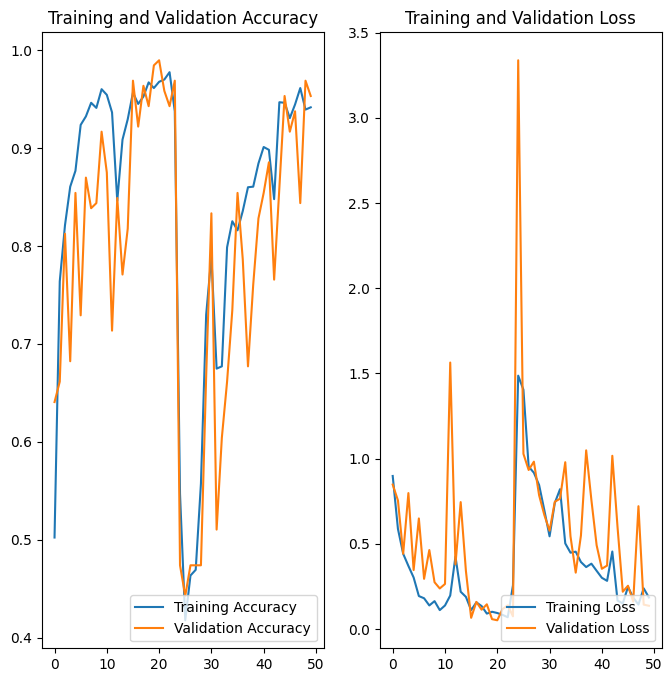

In [18]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(50),history.history["accuracy"],label="Training Accuracy")
plt.plot(range(50),history.history["val_accuracy"],label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(range(50),history.history["loss"],label="Training Loss")
plt.plot(range(50),history.history["val_loss"],label="Validation Loss")
plt.legend(loc="lower right")
plt.title("Training and Validation Loss")

2025-01-22 17:06:58.998849: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
Potato___Late_blight


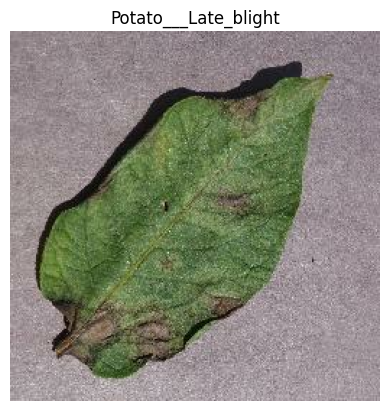

In [19]:
import numpy as np
for images_batch,labels_batch in test_ds.take(1):
  plt.imshow(images_batch[0].numpy().astype("uint8"))
  plt.title(class_names[labels_batch[0]])
  plt.axis("off")
predicted_label=model.predict(images_batch)
print(class_names[np.argmax(predicted_label[0])])

In [20]:
def predict(model,img):
  img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array=tf.expand_dims(img_array,0)
  predictions=model.predict(img_array)
  predicted_class=class_names[np.argmax(predictions[0])]
  confidence=round(100*np.max(predictions[0]),2)
  return predicted_class,confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


2025-01-22 17:07:07.809245: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


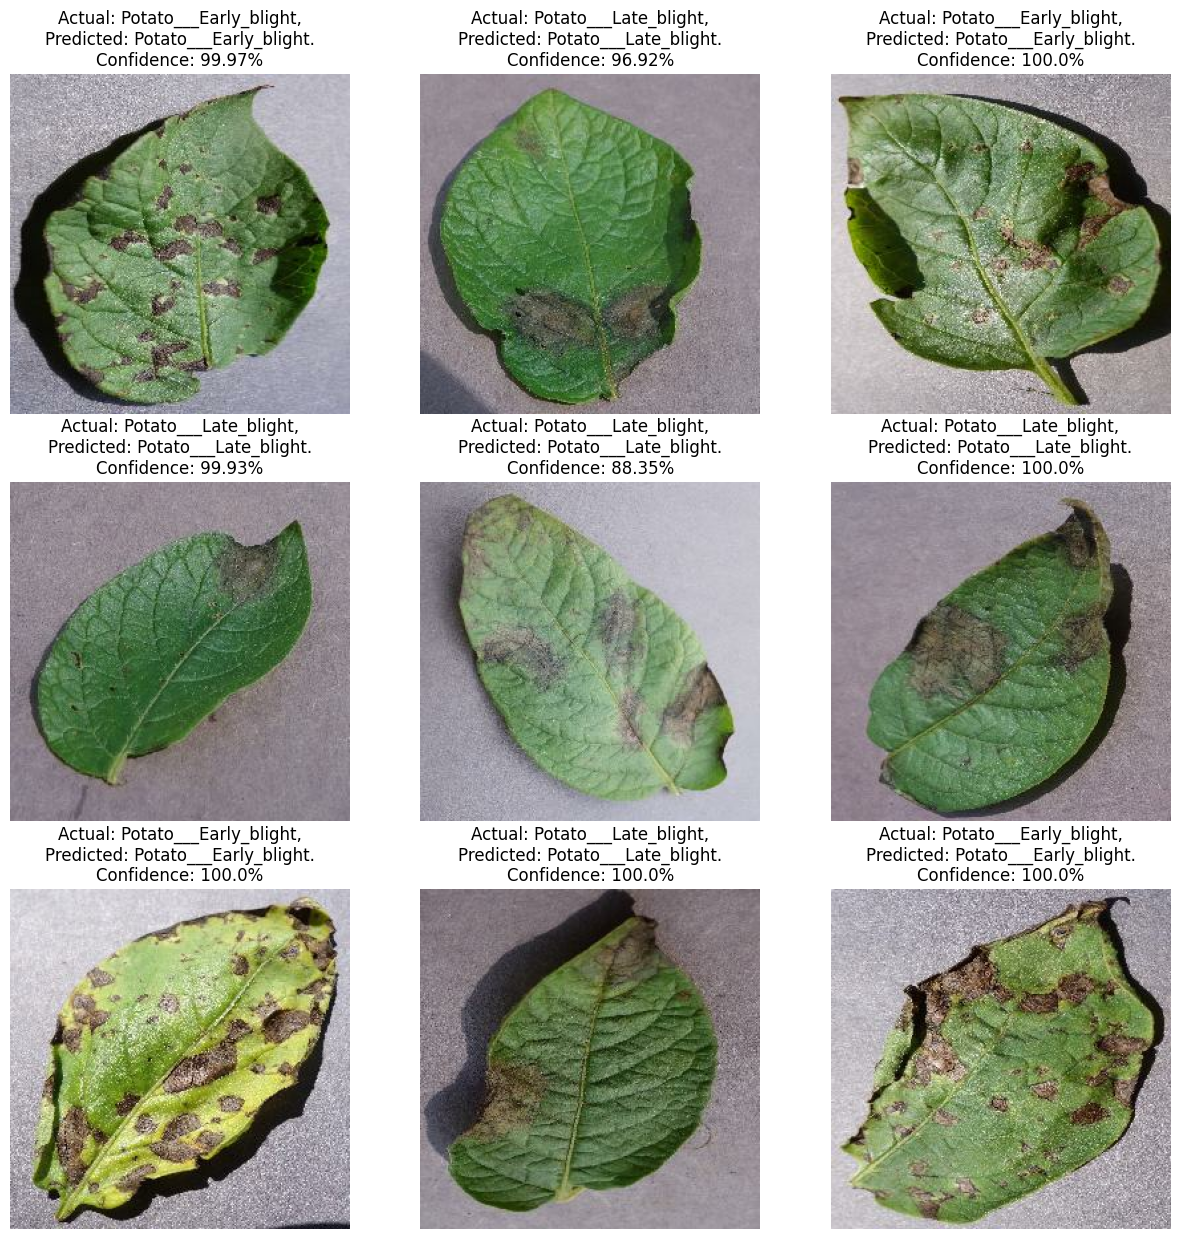

In [21]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    predicted_class,confidence=predict(model,images[i].numpy())
    actual_labels=class_names[labels[i]]
    plt.title(f"Actual: {actual_labels},\nPredicted: {predicted_class}.\nConfidence: {confidence}%")
    plt.axis("off")

In [32]:
model.export("/Users/kashishmandhane/Documents/Kashish Data/Coding/Deep Learning/Practice Mini Project/models/DL_model_1")

INFO:tensorflow:Assets written to: /Users/kashishmandhane/Documents/Kashish Data/Coding/Deep Learning/Practice Mini Project/models/DL_model_1/assets


INFO:tensorflow:Assets written to: /Users/kashishmandhane/Documents/Kashish Data/Coding/Deep Learning/Practice Mini Project/models/DL_model_1/assets


Saved artifact at '/Users/kashishmandhane/Documents/Kashish Data/Coding/Deep Learning/Practice Mini Project/models/DL_model_1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor_3')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  6437580640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6437627856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6437629616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6437629792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6437644240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6437643888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6437646176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6437658688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6437661152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6437660800: TensorSpec(shape=(), dtyp

In [33]:
model.save("/Users/kashishmandhane/Documents/Kashish Data/Coding/Deep Learning/Practice Mini Project/models/potatoes.h5")